In [32]:
import numpy as np
import glob2 as glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [48]:
DATA_DIR = '../data/rl_agent_outputs/det_reward_to_stoch_2024-08-12_17_52_14_708907'
CTRL_DATA_DIR = '../data/naive_agent_outputs/det_reward_to_stoch_2024-08-12_22_28_13_424611'
AVERAGING_SIZE = 50

In [49]:
def load_data(data_path):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / AVERAGING_SIZE)))
    for k in range(0, data.shape[1], AVERAGING_SIZE):
        reduced_data[:, int(k / AVERAGING_SIZE)] = data[:, k:k + AVERAGING_SIZE].mean(axis=1)
    return reduced_data
    

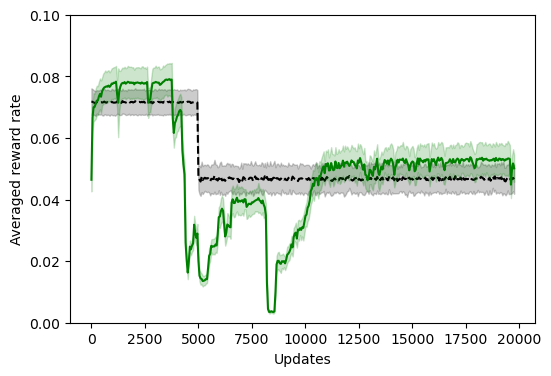

In [62]:
reduced_data = load_data(os.path.join(DATA_DIR, '*.npy'))
ctrl_data = load_data(os.path.join(CTRL_DATA_DIR, '*.npy'))


n_lines = reduced_data.shape[0]
cmap = mpl.colormaps['plasma']
colors = cmap(np.linspace(0, 1, n_lines))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

# for i in range(ctrl_data.shape[0]):
#     axs.plot(
#         np.arange(ctrl_data.shape[1]) * AVERAGING_SIZE,
#         ctrl_data.T[:, i] + i * 0.1,
#         '--',
#         c='grey',
#     )

#     axs.plot(
#         np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
#         reduced_data.T[:, i] + i * 0.1,
#         c=colors[i],
#     )

axs.fill_between(
    np.arange(ctrl_data.shape[1]) * AVERAGING_SIZE,
    np.mean(ctrl_data.T, axis=1) - np.std(ctrl_data.T, axis=1),
    np.mean(ctrl_data.T, axis=1) + np.std(ctrl_data.T, axis=1),
    color='black',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(ctrl_data.shape[1]) * AVERAGING_SIZE,
    np.mean(ctrl_data.T, axis=1),
    '--',
    c='black',
    zorder=1,
)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
)

axs.set_ylim(0, 0.1)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
print()